In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
import random

In [2]:
data_structure = pd.read_csv('Dataset/Building_Structure.csv')
data_owner = pd.read_csv('Dataset/Building_Ownership_Use.csv')
data_train = pd.read_csv('Dataset/train.csv')
data_test = pd.read_csv('Dataset/test.csv')

In [3]:
data_train = data_train.merge(data_structure,on='building_id')
data_train = data_train.merge(data_owner,on='building_id')
data_test = data_test.merge(data_structure,on='building_id')
data_test = data_test.merge(data_owner,on='building_id')
del data_owner,data_structure

In [4]:
le = LabelEncoder()
data_train['district_id'] = le.fit_transform(data_train['district_id_x'])
data_test['district_id'] = le.transform(data_test['district_id_x'])
print('done')

#data_train['ward_id'] = le.fit_transform(data_train['ward_id_x'])
#data_test['ward_id'] = le.transform(data_test['ward_id_x'])

#data_train['vdcmun_id'] = le.fit_transform(data_train['vdcmun_id_x'])
#data_test['vdcmun_id'] = le.transform(data_test['vdcmun_id_x'])

del data_train['district_id_x'],data_train['district_id_y'],data_train['vdcmun_id_x'],data_train['vdcmun_id_y']
del data_test['district_id_x'],data_test['district_id_y'],data_test['vdcmun_id_x'],data_test['vdcmun_id_y']
del data_test['ward_id_x'],data_test['ward_id_y'],data_train['ward_id_x'],data_train['ward_id_y']

done


In [5]:
data_train['has_repair_started'] = data_train.has_repair_started.fillna(2)
data_train['count_families'] = data_train.count_families.fillna(1)
data_test['has_repair_started'] = data_test.has_repair_started.fillna(2)
data_test['count_families'] = data_test.count_families.fillna(1)

data_train.index = data_train.building_id
data_test.index = data_test.building_id

In [6]:
cat_var_tf = ['has_geotechnical_risk','has_geotechnical_risk_fault_crack','has_geotechnical_risk_flood',
              'has_geotechnical_risk_land_settlement','has_geotechnical_risk_landslide','has_geotechnical_risk_liquefaction',
              'has_geotechnical_risk_other','has_geotechnical_risk_rock_fall','has_superstructure_adobe_mud',
              'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',
              'has_superstructure_mud_mortar_brick','has_superstructure_timber','has_superstructure_bamboo',
              'has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_other',
              'has_secondary_use', 'has_superstructure_cement_mortar_brick',
              'has_secondary_use_agriculture','has_secondary_use_hotel', 'has_secondary_use_rental',
              'has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry',
              'has_secondary_use_health_post','has_secondary_use_gov_office', 'has_secondary_use_use_police',
              'has_secondary_use_other'
             ]
cat_var = ['area_assesed','district_id','has_repair_started',
           #'vdcmun_id','ward_id',
          'land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position',
          'plan_configuration','condition_post_eq','legal_ownership_status']

cont_var = ['count_floors_pre_eq','count_floors_post_eq','age_building','plinth_area_sq_ft','height_ft_pre_eq',
            'height_ft_post_eq','count_families']

In [7]:
def encoder(series):
    le = LabelEncoder().fit(series)
    series = le.transform(series).reshape([-1,1])
    oh = OneHotEncoder().fit(series)
    series = oh.transform(series)
    return series,le,oh

In [8]:
ans,le,oh = encoder(data_train.area_assesed)
ans_test = le.transform(data_test.area_assesed).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.has_repair_started)
ans_test = le.transform(data_test.has_repair_started).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.land_surface_condition)
ans_test = le.transform(data_test.land_surface_condition).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.foundation_type)
ans_test = le.transform(data_test.foundation_type).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.roof_type)
ans_test = le.transform(data_test.roof_type).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.ground_floor_type)
ans_test = le.transform(data_test.ground_floor_type).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.other_floor_type)
ans_test = le.transform(data_test.other_floor_type).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.position)
ans_test = le.transform(data_test.position).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.plan_configuration)
ans_test = le.transform(data_test.plan_configuration).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.condition_post_eq)
ans_test = le.transform(data_test.condition_post_eq).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

ans,le,oh = encoder(data_train.legal_ownership_status)
ans_test = le.transform(data_test.legal_ownership_status).reshape([-1,1])
ans_test = oh.transform(ans_test)
data_test = pd.concat([data_test,pd.DataFrame(ans_test.toarray(),columns=le.classes_,index=data_test.index)],axis=1)
data_train = pd.concat([data_train,pd.DataFrame(ans.toarray(),columns=le.classes_,index=data_train.index)],axis=1)

del ans,ans_test,le,oh

In [9]:
for var in cont_var:
    sc = StandardScaler()
    data_train[var] = sc.fit_transform(data_train[var].values.reshape([-1,1]))
    data_test[var] = sc.transform(data_test[var].values.reshape([-1,1]))

c:\users\cheyeswa\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
rem = ['area_assesed','has_repair_started','building_id','vdcmun_id',#'ward_id',
       'land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position',
          'plan_configuration','condition_post_eq','legal_ownership_status']
data_train.drop(rem,axis=1,inplace=True)
data_test.drop(rem,axis=1,inplace=True)

In [11]:
y = data_train.pop('damage_grade')
col = data_train.columns
le = LabelEncoder().fit(y)
y = le.transform(y)
#X,y = SMOTE().fit_sample(data_train.values,y)
y = y.reshape([-1,1])
oh = OneHotEncoder().fit(y)
y = oh.transform(y)
y = y.toarray()
#del data_train

In [12]:
list(col).index('district_id')

25

In [13]:
n_features = col.shape[0]-1

In [14]:
n_features

91

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_train.values, y, test_size=0.2, random_state=42)

In [17]:
dist_train = X_train[:,25]
dist_train = dist_train.astype(np.int32)
dist_test = X_test[:,25]
dist_train = dist_train.astype(np.int32)

In [18]:
X_train = np.delete(X_train,25,axis=1)
X_test = np.delete(X_test,25,axis=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [91]:
def create_batch(X_train,y_train,dist_train,batch_size = 10000):
    ch = random.choice(range(15,30))/10
    w =ch-np.argmax(y_train,axis=1)/(ch+0.5)
    i = random.choices(range(X_train.shape[0]),weights=w,k=batch_size)
    x_batch = X_train[i]
    y_batch = y_train[i]
    dist_batch = dist_train[i]
    return x_batch,y_batch,dist_batch

In [92]:
a,b,c = create_batch(X_train,y_train,dist_train)
(b==1).sum(axis=0)

array([4393, 3621, 1986,    0,    0])

In [21]:
import tensorflow as tf

In [30]:
grapf = tf.Graph()

In [34]:
with grapf.as_default():
    tf_x = tf.placeholder(shape=[None,n_features],dtype=tf.float32)
    tf_y = tf.placeholder(shape=[None,5],dtype=tf.float32)
    tf_dist = tf.placeholder(shape=[None],dtype=tf.int32)

    embed_dist = tf.Variable(tf.truncated_normal(shape=[31,10]))
    tf_dist_ = tf.nn.embedding_lookup(embed_dist,tf_dist)

    tf_x_n = tf.concat([tf_x,tf_dist_],axis=1)

    W = tf.Variable(tf.truncated_normal(shape=[n_features+10,5],dtype=tf.float32))
    b = tf.Variable(tf.truncated_normal(shape=[5]))

    pred = tf.matmul(tf_x_n,W) + b
    tf_pred = tf.nn.softmax(pred)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=tf_y))

    optimizer = tf.train.AdamOptimizer(0.008).minimize(cost)

In [35]:
sess = tf.InteractiveSession(graph=grapf)

In [36]:
train_l = []
test_l = []
tf.global_variables_initializer().run()
for i in range(500):
    batch_x,batch_y,batch_dist = create_batch(X_train,y_train,dist_train)
    feed_dict = {
        tf_x:batch_x,
        tf_y:batch_y,
        tf_dist:batch_dist
    }
    loss,_ = sess.run([cost,optimizer],feed_dict=feed_dict)
    if i%30 == 0:
        print(loss)
        feed_dict = {
            tf_x:X_train,
            tf_y:y_train,
            tf_dist:dist_train
        }
        prediction = sess.run(tf_pred,feed_dict=feed_dict) 
        prediction = oh.transform(np.argmax(prediction,axis=1).reshape([-1,1])).toarray()
        train_l.append(metrics.accuracy_score(y_train,prediction))
        feed_dict = {
            tf_x:X_test,
            tf_y:y_test,
            tf_dist:dist_test
        }
        prediction = sess.run(tf_pred,feed_dict=feed_dict)
        prediction = oh.transform(np.argmax(prediction,axis=1).reshape([-1,1])).toarray()
        test_l.append(metrics.accuracy_score(y_test,prediction))

4.058239
2.208353
1.5348314
1.1944594
1.0329543
0.8740247
0.94363934
0.7967173
0.76373523
0.79603976
0.8062041
0.8361033
0.78716856
0.71951854
0.70943916
0.7539448
0.74796426


In [26]:
import matplotlib.pyplot as plt

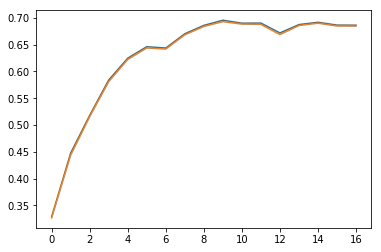

In [37]:
plt.plot(train_l)
plt.plot(test_l)

In [39]:
dist_id = data_test.pop('district_id')

In [41]:
dist_id = dist_id.values.astype(np.int32)
test = data_test.values.astype(np.float32)

In [42]:
feed_dict = {
    tf_x:test,
    tf_dist:dist_id
}
prediction = sess.run(tf_pred,feed_dict=feed_dict)

In [45]:
final = pd.read_csv('Dataset/sample_submission.csv')

In [56]:
final['damage_grade'] = le.inverse_transform(np.argmax(prediction,axis=1))

c:\users\cheyeswa\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [60]:
final.to_csv('ans.csv',index=False)

In [55]:
final[final.damage_grade ==4].shape

(133796, 2)

In [58]:
final

(421175, 2)

In [59]:
data_test.shape

(421175, 91)